In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Updated_DS (2) (1) final.csv")
df_copy=df.copy()

In [3]:
algorithm="C4.5"

In [4]:
df

ID  Sand %  Clay %  Silt %    pH  EC mS/cm  O.M. %  CACO3 %  N_NO3 ppm  \
0      1    42.0    38.0    20.0  5.16     0.274    3.78     0.00      14.46   
1      2    54.0    26.0    20.0  6.07     0.355    1.45     0.00      14.59   
2      3    28.0    36.0    36.0  6.92     0.675    1.77     0.40      14.91   
3      4    58.0    20.0    22.0  7.70     0.355    0.72     6.80       4.21   
4      5    33.2    41.2    25.6  7.61     0.392    1.00     4.39       6.11   
..   ...     ...     ...     ...   ...       ...     ...      ...        ...   
776  777    26.0    46.0    28.0  6.72     0.454    2.08     0.00       7.66   
777  778    40.0    28.0    32.0  7.79     0.343    1.38    30.00       5.20   
778  779    34.0    28.0    38.0  7.63     1.135    1.87    24.30      17.13   
779  780    16.0    38.0    46.0  7.73     0.393    1.72    46.30       3.92   
780  781    20.0    34.0    46.0  7.80     0.388    2.66    36.30      10.35   

     P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm  B ppm        Crop  \
0    18.61     147    1115   91.32    0.89   27.06    1.77   0.40  Chick peas   
1    32.74     180    1055   60.04    3.66   17.58    1.68   0.41      Barley   
2    19.02     183    1215   61.24    3.06   18.00    1.84   0.46   sugarcane   
3     6.28     116     327   19.54    1.64    5.04    0.84   0.50      cotton   
4     6.55     228     939   25.84    0.18    7.16    1.22   0.40    chillies   
..     ...     ...     ...     ...     ...     ...     ...    ...         ...   
776  20.67     395     500   38.07    0.39   26.48    1.47   0.33  sugar cane   
777   4.14     286     154   12.79    0.24    6.33    0.60   0.12       paddy   
778   6.90     582     164   10.73    0.44    5.39    1.14   0.26   groundnut   
779   7.93     335     572   11.61    0.26    3.77    2.20   0.27   soy beans   
780   3.68     622     425   12.59    0.37    5.44    5.72   0.30       wheat   

     Salinity          Organic Manure  
0         4.6          Poultry Manure  
1         5.7              Cow Manure  
2         2.6            VermiCompost  
3         5.9  Composted pine needles  
4         3.0              Cow Manure  
..        ...                     ...  
776       2.8          Poultry Manure  
777       4.5          Poultry Manure  
778       5.7            VermiCompost  
779       2.9             Wormcasting  
780       4.8          Chicken Manure  

[781 rows x 20 columns]

In [5]:
df = df.dropna(how='any',axis=0)

In [6]:
df 

ID  Sand %  Clay %  Silt %    pH  EC mS/cm  O.M. %  CACO3 %  N_NO3 ppm  \
0      1    42.0    38.0    20.0  5.16     0.274    3.78     0.00      14.46   
1      2    54.0    26.0    20.0  6.07     0.355    1.45     0.00      14.59   
2      3    28.0    36.0    36.0  6.92     0.675    1.77     0.40      14.91   
3      4    58.0    20.0    22.0  7.70     0.355    0.72     6.80       4.21   
4      5    33.2    41.2    25.6  7.61     0.392    1.00     4.39       6.11   
..   ...     ...     ...     ...   ...       ...     ...      ...        ...   
776  777    26.0    46.0    28.0  6.72     0.454    2.08     0.00       7.66   
777  778    40.0    28.0    32.0  7.79     0.343    1.38    30.00       5.20   
778  779    34.0    28.0    38.0  7.63     1.135    1.87    24.30      17.13   
779  780    16.0    38.0    46.0  7.73     0.393    1.72    46.30       3.92   
780  781    20.0    34.0    46.0  7.80     0.388    2.66    36.30      10.35   

     P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm  B ppm        Crop  \
0    18.61     147    1115   91.32    0.89   27.06    1.77   0.40  Chick peas   
1    32.74     180    1055   60.04    3.66   17.58    1.68   0.41      Barley   
2    19.02     183    1215   61.24    3.06   18.00    1.84   0.46   sugarcane   
3     6.28     116     327   19.54    1.64    5.04    0.84   0.50      cotton   
4     6.55     228     939   25.84    0.18    7.16    1.22   0.40    chillies   
..     ...     ...     ...     ...     ...     ...     ...    ...         ...   
776  20.67     395     500   38.07    0.39   26.48    1.47   0.33  sugar cane   
777   4.14     286     154   12.79    0.24    6.33    0.60   0.12       paddy   
778   6.90     582     164   10.73    0.44    5.39    1.14   0.26   groundnut   
779   7.93     335     572   11.61    0.26    3.77    2.20   0.27   soy beans   
780   3.68     622     425   12.59    0.37    5.44    5.72   0.30       wheat   

     Salinity          Organic Manure  
0         4.6          Poultry Manure  
1         5.7              Cow Manure  
2         2.6            VermiCompost  
3         5.9  Composted pine needles  
4         3.0              Cow Manure  
..        ...                     ...  
776       2.8          Poultry Manure  
777       4.5          Poultry Manure  
778       5.7            VermiCompost  
779       2.9             Wormcasting  
780       4.8          Chicken Manure  

[780 rows x 20 columns]

In [7]:
df.drop(columns='ID',inplace=True)
df

C:\Users\aulug\AppData\Local\Temp\ipykernel_32480\1905770338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='ID',inplace=True)


Sand %  Clay %  Silt %    pH  EC mS/cm  O.M. %  CACO3 %  N_NO3 ppm  \
0      42.0    38.0    20.0  5.16     0.274    3.78     0.00      14.46   
1      54.0    26.0    20.0  6.07     0.355    1.45     0.00      14.59   
2      28.0    36.0    36.0  6.92     0.675    1.77     0.40      14.91   
3      58.0    20.0    22.0  7.70     0.355    0.72     6.80       4.21   
4      33.2    41.2    25.6  7.61     0.392    1.00     4.39       6.11   
..      ...     ...     ...   ...       ...     ...      ...        ...   
776    26.0    46.0    28.0  6.72     0.454    2.08     0.00       7.66   
777    40.0    28.0    32.0  7.79     0.343    1.38    30.00       5.20   
778    34.0    28.0    38.0  7.63     1.135    1.87    24.30      17.13   
779    16.0    38.0    46.0  7.73     0.393    1.72    46.30       3.92   
780    20.0    34.0    46.0  7.80     0.388    2.66    36.30      10.35   

     P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm  B ppm        Crop  \
0    18.61     147    1115   91.32    0.89   27.06    1.77   0.40  Chick peas   
1    32.74     180    1055   60.04    3.66   17.58    1.68   0.41      Barley   
2    19.02     183    1215   61.24    3.06   18.00    1.84   0.46   sugarcane   
3     6.28     116     327   19.54    1.64    5.04    0.84   0.50      cotton   
4     6.55     228     939   25.84    0.18    7.16    1.22   0.40    chillies   
..     ...     ...     ...     ...     ...     ...     ...    ...         ...   
776  20.67     395     500   38.07    0.39   26.48    1.47   0.33  sugar cane   
777   4.14     286     154   12.79    0.24    6.33    0.60   0.12       paddy   
778   6.90     582     164   10.73    0.44    5.39    1.14   0.26   groundnut   
779   7.93     335     572   11.61    0.26    3.77    2.20   0.27   soy beans   
780   3.68     622     425   12.59    0.37    5.44    5.72   0.30       wheat   

     Salinity          Organic Manure  
0         4.6          Poultry Manure  
1         5.7              Cow Manure  
2         2.6            VermiCompost  
3         5.9  Composted pine needles  
4         3.0              Cow Manure  
..        ...                     ...  
776       2.8          Poultry Manure  
777       4.5          Poultry Manure  
778       5.7            VermiCompost  
779       2.9             Wormcasting  
780       4.8          Chicken Manure  

[780 rows x 19 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 780
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sand %          780 non-null    float64
 1   Clay %          780 non-null    float64
 2   Silt %          780 non-null    float64
 3   pH              780 non-null    float64
 4   EC mS/cm        780 non-null    float64
 5   O.M. %          780 non-null    float64
 6   CACO3 %         780 non-null    float64
 7   N_NO3 ppm       780 non-null    float64
 8   P ppm           780 non-null    float64
 9   K ppm           780 non-null    int64  
 10  Mg ppm          780 non-null    int64  
 11  Fe ppm          780 non-null    float64
 12  Zn ppm          780 non-null    float64
 13  Mn ppm          780 non-null    float64
 14  Cu ppm          780 non-null    float64
 15  B ppm           780 non-null    float64
 16  Crop            780 non-null    object 
 17  Salinity        780 non-null    flo

In [9]:
df.describe()

Sand %      Clay %      Silt %          pH    EC mS/cm      O.M. %  \
count  780.000000  780.000000  780.000000  780.000000  780.000000  780.000000   
mean    31.531282   34.993333   33.475385    7.136833    0.453145    2.028641   
std     10.985279   11.259158    8.389385    0.894003    0.304877    0.627615   
min     10.000000    6.000000   14.000000    4.490000    0.134000    0.370000   
25%     24.000000   28.000000   28.000000    6.667500    0.339500    1.590000   
50%     30.000000   36.000000   32.000000    7.550000    0.404500    1.960000   
75%     38.500000   44.000000   38.000000    7.780000    0.497500    2.372500   
max     70.000000   64.000000   68.000000    8.200000    5.621000    4.980000   

          CACO3 %   N_NO3 ppm       P ppm       K ppm        Mg ppm  \
count  780.000000  780.000000  780.000000   780.000000   780.000000   
mean    13.437974   11.630872   13.840154   296.325641   820.741026   
std     13.382813   11.057176   14.595374   194.566149   742.662559   
min      0.000000    0.180000    1.070000    31.000000    60.000000   
25%      1.800000    5.280000    5.727500   169.000000   363.500000   
50%      8.755000    8.870000    9.480000   255.000000   567.000000   
75%     22.000000   14.320000   15.987500   358.500000  1001.000000   
max     77.600000  120.640000  152.420000  1665.000000  4836.000000   

           Fe ppm      Zn ppm      Mn ppm      Cu ppm       B ppm    Salinity  
count  780.000000  780.000000  780.000000  780.000000  780.000000  780.000000  
mean    31.163167    0.675064   15.870500    2.032590    0.383628    4.256026  
std     26.006196    0.681181   15.169134    2.457073    0.222135    1.227436  
min      4.630000    0.100000    2.380000    0.210000    0.100000    1.000000  
25%     13.210000    0.310000    6.750000    1.080000    0.230000    3.000000  
50%     19.815000    0.480000   10.105000    1.480000    0.350000    4.400000  
75%     42.947500    0.772500   19.162500    2.130000    0.472500    5.200000  
max    187.940000    7.090000  189.210000   33.910000    1.900000    7.900000

In [10]:
df.isnull().sum()

Sand %            0
Clay %            0
Silt %            0
pH                0
EC mS/cm          0
O.M. %            0
CACO3 %           0
N_NO3 ppm         0
P ppm             0
K ppm             0
Mg ppm            0
Fe ppm            0
Zn ppm            0
Mn ppm            0
Cu ppm            0
B ppm             0
Crop              0
Salinity          0
Organic Manure    0
dtype: int64

In [11]:
df.columns

Index(['Sand %', 'Clay %', 'Silt %', 'pH', 'EC mS/cm', 'O.M. %', 'CACO3 %',
       'N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm',
       'Cu ppm', 'B ppm', 'Crop', 'Salinity', 'Organic Manure'],
      dtype='object')

In [12]:
df.head(10)

Sand %  Clay %  Silt %    pH  EC mS/cm  O.M. %  CACO3 %  N_NO3 ppm  P ppm  \
0    42.0    38.0    20.0  5.16     0.274    3.78     0.00      14.46  18.61   
1    54.0    26.0    20.0  6.07     0.355    1.45     0.00      14.59  32.74   
2    28.0    36.0    36.0  6.92     0.675    1.77     0.40      14.91  19.02   
3    58.0    20.0    22.0  7.70     0.355    0.72     6.80       4.21   6.28   
4    33.2    41.2    25.6  7.61     0.392    1.00     4.39       6.11   6.55   
5    29.2    46.8    24.0  6.50     0.349    0.94     0.00       6.02  14.31   
6    37.2    34.8    28.0  6.47     0.975    2.36     0.00      35.56  14.45   
7    26.8    47.2    26.0  5.70     0.210    1.70     0.00       4.78  12.10   
8    29.2    44.8    26.0  6.06     0.266    2.20     0.00       3.51  10.02   
9    31.2    32.8    36.0  7.55     0.483    2.47     8.71       9.03   4.89   

   K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm  B ppm          Crop  \
0     147    1115   91.32    0.89   27.06    1.77   0.40    Chick peas   
1     180    1055   60.04    3.66   17.58    1.68   0.41        Barley   
2     183    1215   61.24    3.06   18.00    1.84   0.46     sugarcane   
3     116     327   19.54    1.64    5.04    0.84   0.50        cotton   
4     228     939   25.84    0.18    7.16    1.22   0.40      chillies   
5     231    3110   69.25    0.27   15.54    2.12   0.42        tomato   
6     183    1215  108.00    0.32   38.28    1.63   0.46  bottle gourd   
7     270    1047   97.00    0.33   24.60    1.44   0.39        carrot   
8     210    1155   62.14    0.50   32.16    1.17   0.45    green peas   
9     159     538   22.42    0.16    4.96    0.67   0.40       sorghum   

   Salinity          Organic Manure  
0       4.6          Poultry Manure  
1       5.7              Cow Manure  
2       2.6            VermiCompost  
3       5.9  Composted pine needles  
4       3.0              Cow Manure  
5       2.4          Chicken Manure  
6       3.3                 Compost  
7       3.7               Bone Meal  
8       2.8            VermiCompost  
9       5.3         Farmyard Manure

In [13]:
df.tail(10)

Sand %  Clay %  Silt %    pH  EC mS/cm  O.M. %  CACO3 %  N_NO3 ppm  \
771    36.0    38.0    26.0  7.87     0.310    2.04     23.0       6.30   
772    38.0    38.0    24.0  7.71     0.311    1.55      6.8       9.07   
773    28.0    36.0    36.0  7.79     0.438    1.69     21.0       6.52   
774    28.0    38.0    34.0  7.75     0.515    1.49     24.8       3.52   
775    44.0    34.0    22.0  7.72     0.430    1.42     27.0       4.32   
776    26.0    46.0    28.0  6.72     0.454    2.08      0.0       7.66   
777    40.0    28.0    32.0  7.79     0.343    1.38     30.0       5.20   
778    34.0    28.0    38.0  7.63     1.135    1.87     24.3      17.13   
779    16.0    38.0    46.0  7.73     0.393    1.72     46.3       3.92   
780    20.0    34.0    46.0  7.80     0.388    2.66     36.3      10.35   

     P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm  B ppm        Crop  \
771   9.11     522    1166   13.11    0.29    5.35    1.34   0.13     sorghum   
772   5.00     360    2014   17.38    0.22    7.27    1.50   0.12    turmeric   
773   8.55     335     267   12.38    0.48    5.38    2.30   0.11      sesame   
774   4.86     367     296   13.35    0.67    6.93    1.64   0.12      sesame   
775   5.21     452     221   11.80    0.39    5.52    1.33   0.12      barley   
776  20.67     395     500   38.07    0.39   26.48    1.47   0.33  sugar cane   
777   4.14     286     154   12.79    0.24    6.33    0.60   0.12       paddy   
778   6.90     582     164   10.73    0.44    5.39    1.14   0.26   groundnut   
779   7.93     335     572   11.61    0.26    3.77    2.20   0.27   soy beans   
780   3.68     622     425   12.59    0.37    5.44    5.72   0.30       wheat   

     Salinity   Organic Manure  
771       5.2  Farmyard Manure  
772       4.6          Compost  
773       3.6          Compost  
774       4.5   Poultry Manure  
775       5.3     Green Manure  
776       2.8   Poultry Manure  
777       4.5   Poultry Manure  
778       5.7     VermiCompost  
779       2.9      Wormcasting  
780       4.8   Chicken Manure

In [14]:
df['Crop'].unique()

array(['Chick peas', 'Barley', 'sugarcane', 'cotton', 'chillies',
       'tomato', 'bottle gourd', 'carrot', 'green peas', 'sorghum',
       'potato', 'ginger', 'wheat', 'groundnut', ' cotton', ' wheat',
       ' maize', ' cabbage', ' sugarcane', ' mustard', ' snake gourd',
       ' paddy', ' cauliflower', ' groundnut', ' sorghum', ' bottlegourd',
       ' ginger', ' turmeric', ' brinjal', ' soybeans', ' chillies',
       ' sunflower', ' barley', ' sesame', ' kidneybean', ' tomato',
       'mango', 'radish', 'kidneybeans', ' pearl millet', ' watermelon',
       'turmeric', ' ridge gourd', ' castor', ' bengalgram', ' blackgram',
       ' pigeon peas', ' chickpeas', ' maize ', 'sunflower', ' mango',
       ' bittergourd', 'pintobeans', ' carrot', 'sesame', ' barley ',
       ' potato', ' pintobeans', 'maize', ' chillies ', ' raddish',
       ' greenpeas', 'cauliflower', ' tomato ', 'paddy', ' Maize',
       ' Sorghum', ' Cabbage', ' redgram', ' sugarcane ', 'barley',
       'watermelon',

In [15]:
df.shape

(780, 19)

In [16]:
df.shape[0]

780

In [17]:
df.shape[1]

19

In [18]:
print(df.iloc[0:1])

   Sand %  Clay %  Silt %    pH  EC mS/cm  O.M. %  CACO3 %  N_NO3 ppm  P ppm  \
0    42.0    38.0    20.0  5.16     0.274    3.78      0.0      14.46  18.61   

   K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm  B ppm        Crop  \
0     147    1115   91.32    0.89   27.06    1.77    0.4  Chick peas   

   Salinity  Organic Manure  
0       4.6  Poultry Manure  


In [19]:
print(df.iloc[0:5,5:8])

   O.M. %  CACO3 %  N_NO3 ppm
0    3.78     0.00      14.46
1    1.45     0.00      14.59
2    1.77     0.40      14.91
3    0.72     6.80       4.21
4    1.00     4.39       6.11


In [20]:
pd.crosstab(index=df['pH'],columns='count')

col_0  count
pH          
4.49       1
4.55       2
4.63       1
4.67       2
4.70       1
...      ...
8.13       1
8.14       3
8.15       2
8.16       3
8.20       1

[265 rows x 1 columns]

In [21]:
pd.crosstab(index=df['Crop'],columns='count')

col_0         count
Crop               
 Cabbage          4
 Maize            1
 Sorghum          1
 barley          17
 barley           2
...             ...
sweet potato     13
tomato           15
turmeric         13
watermelon        1
wheat            12

[96 rows x 1 columns]

In [22]:
pd.crosstab(index=df['Organic Manure'],columns='count')

col_0                   count
Organic Manure               
Blood Meal                 13
Bone Meal                  55
Chicken Manure             34
Compost                   121
Composted pine needles     14
Cow Manure                 95
Farmyard Manure           103
Fish Emulsion              31
Green Manure               87
Neem Cake                   8
Poultry Manure             76
VermiCompost              128
Wormcasting                15

<AxesSubplot:xlabel='Crop', ylabel='count'>

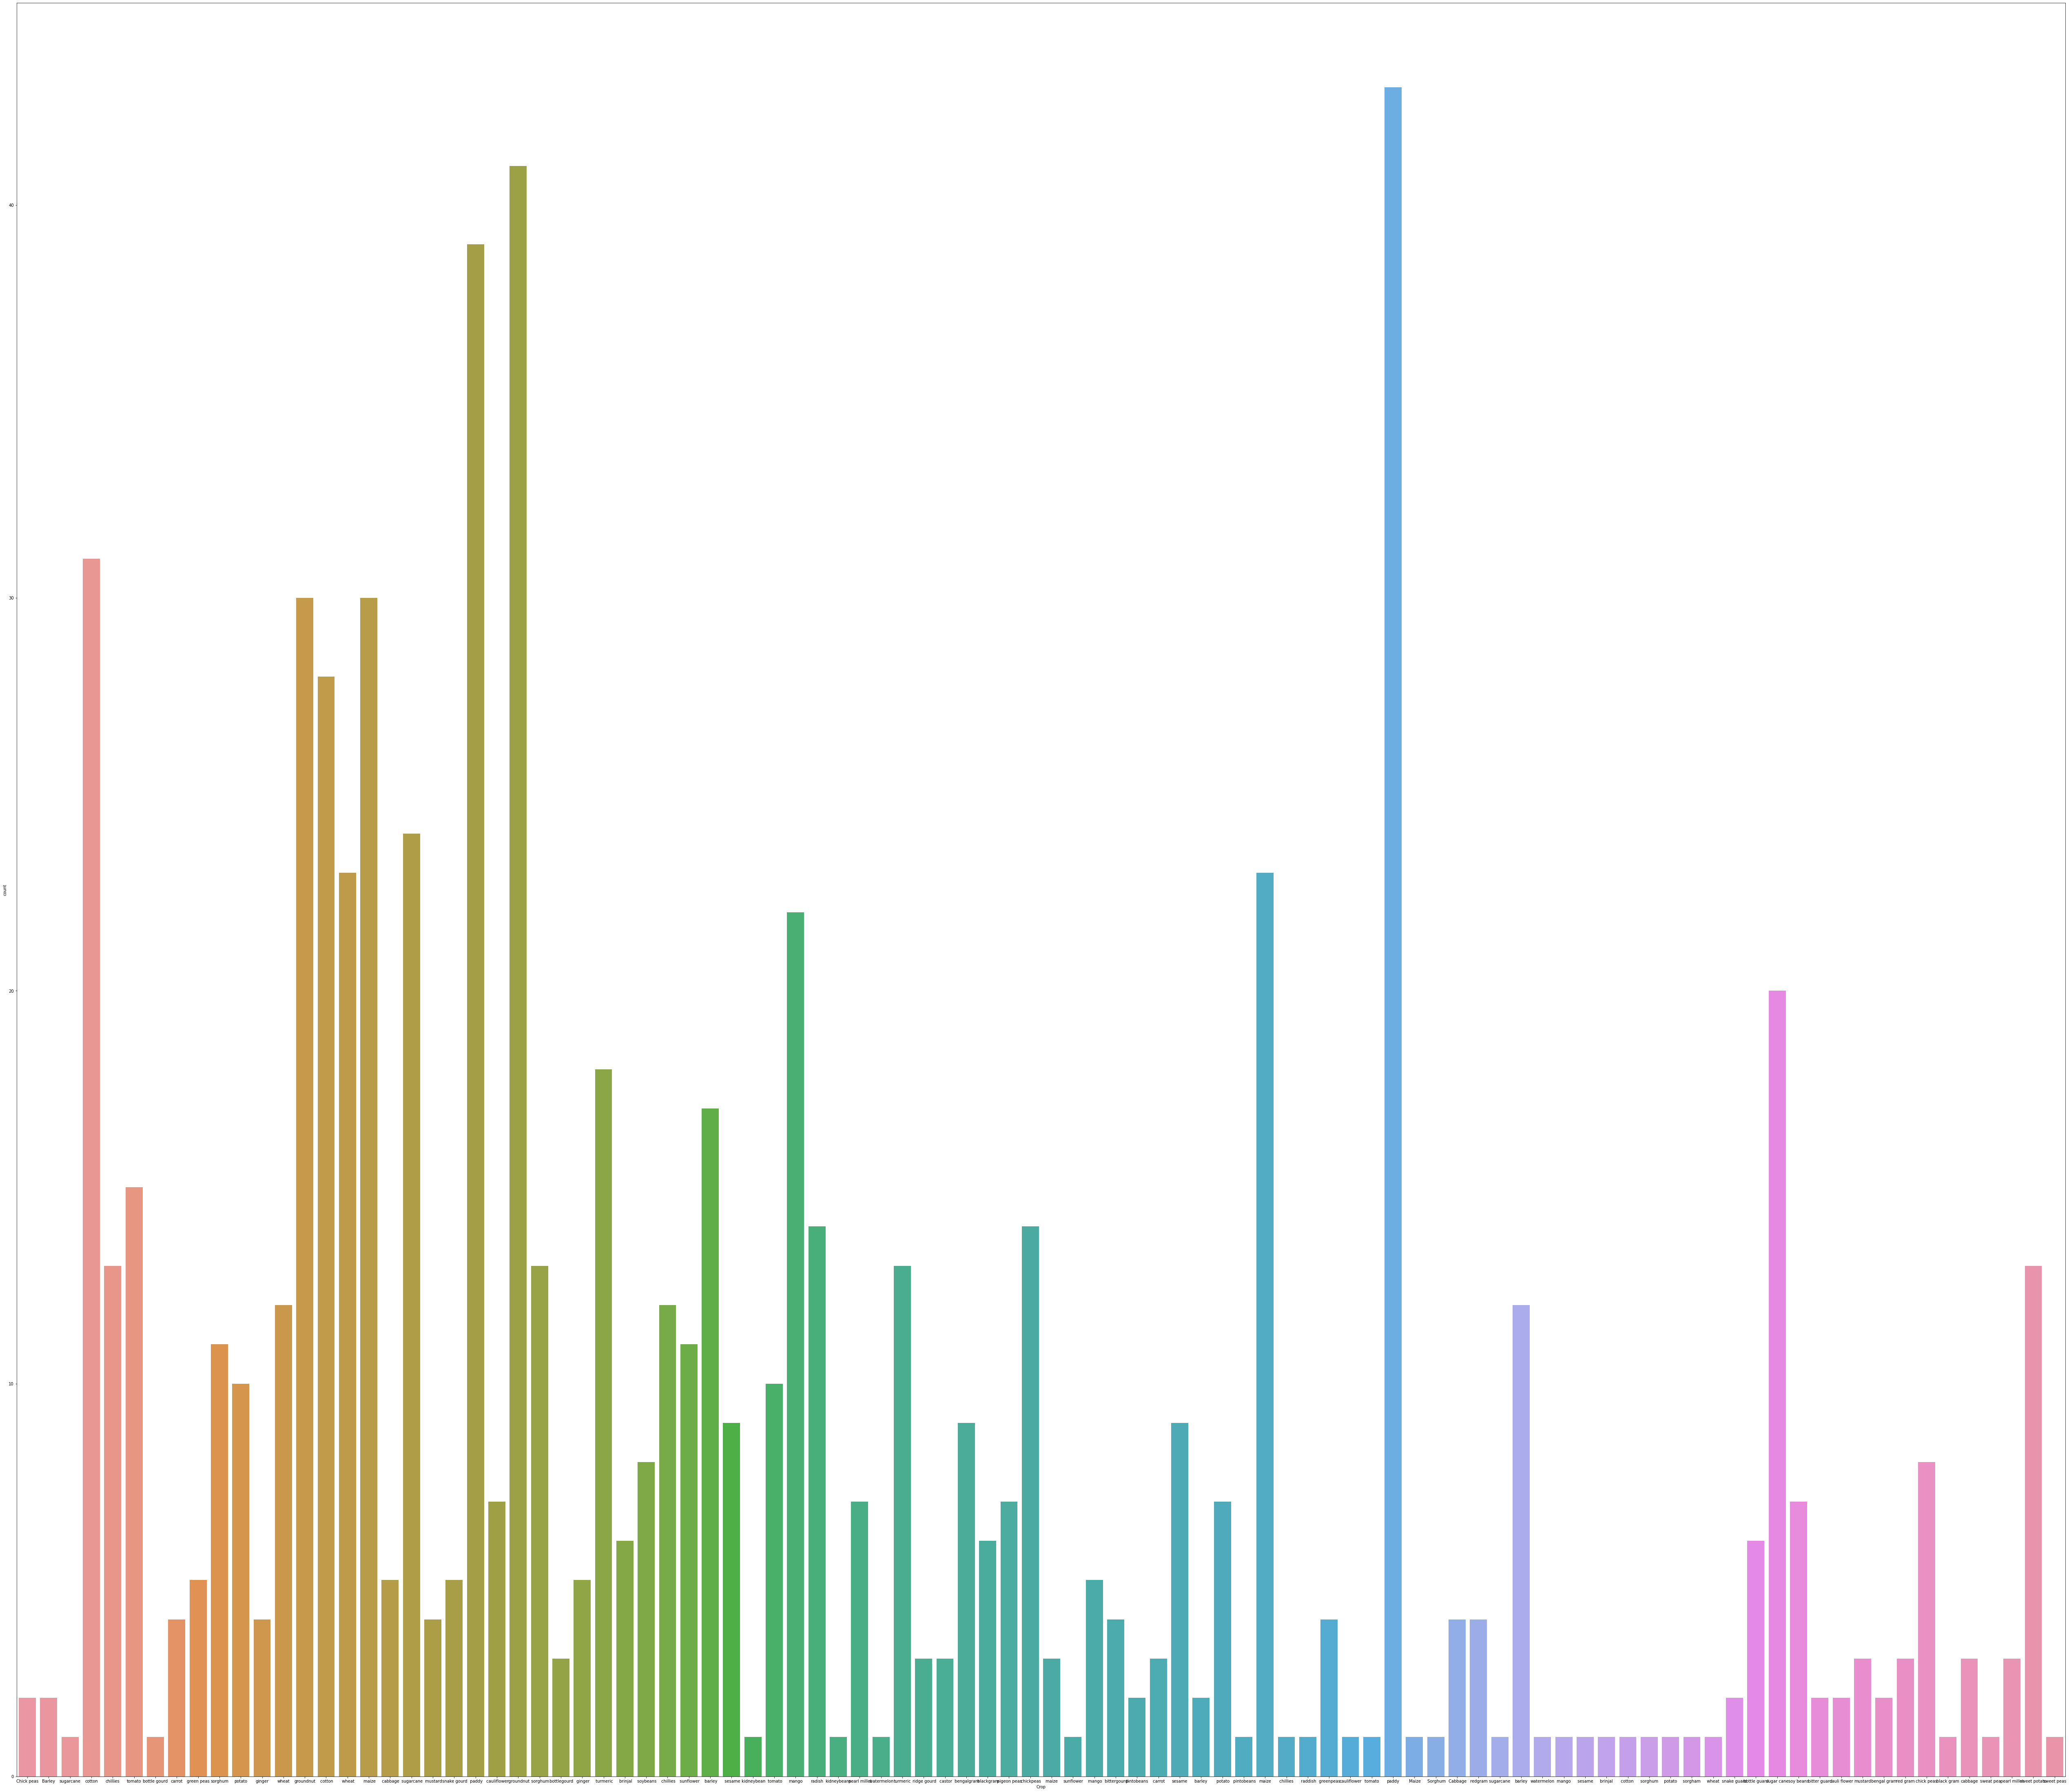

In [23]:
plt.figure(figsize=(90, 80))
sns.countplot(x='Crop',data=df)

<AxesSubplot:xlabel='Organic Manure', ylabel='count'>

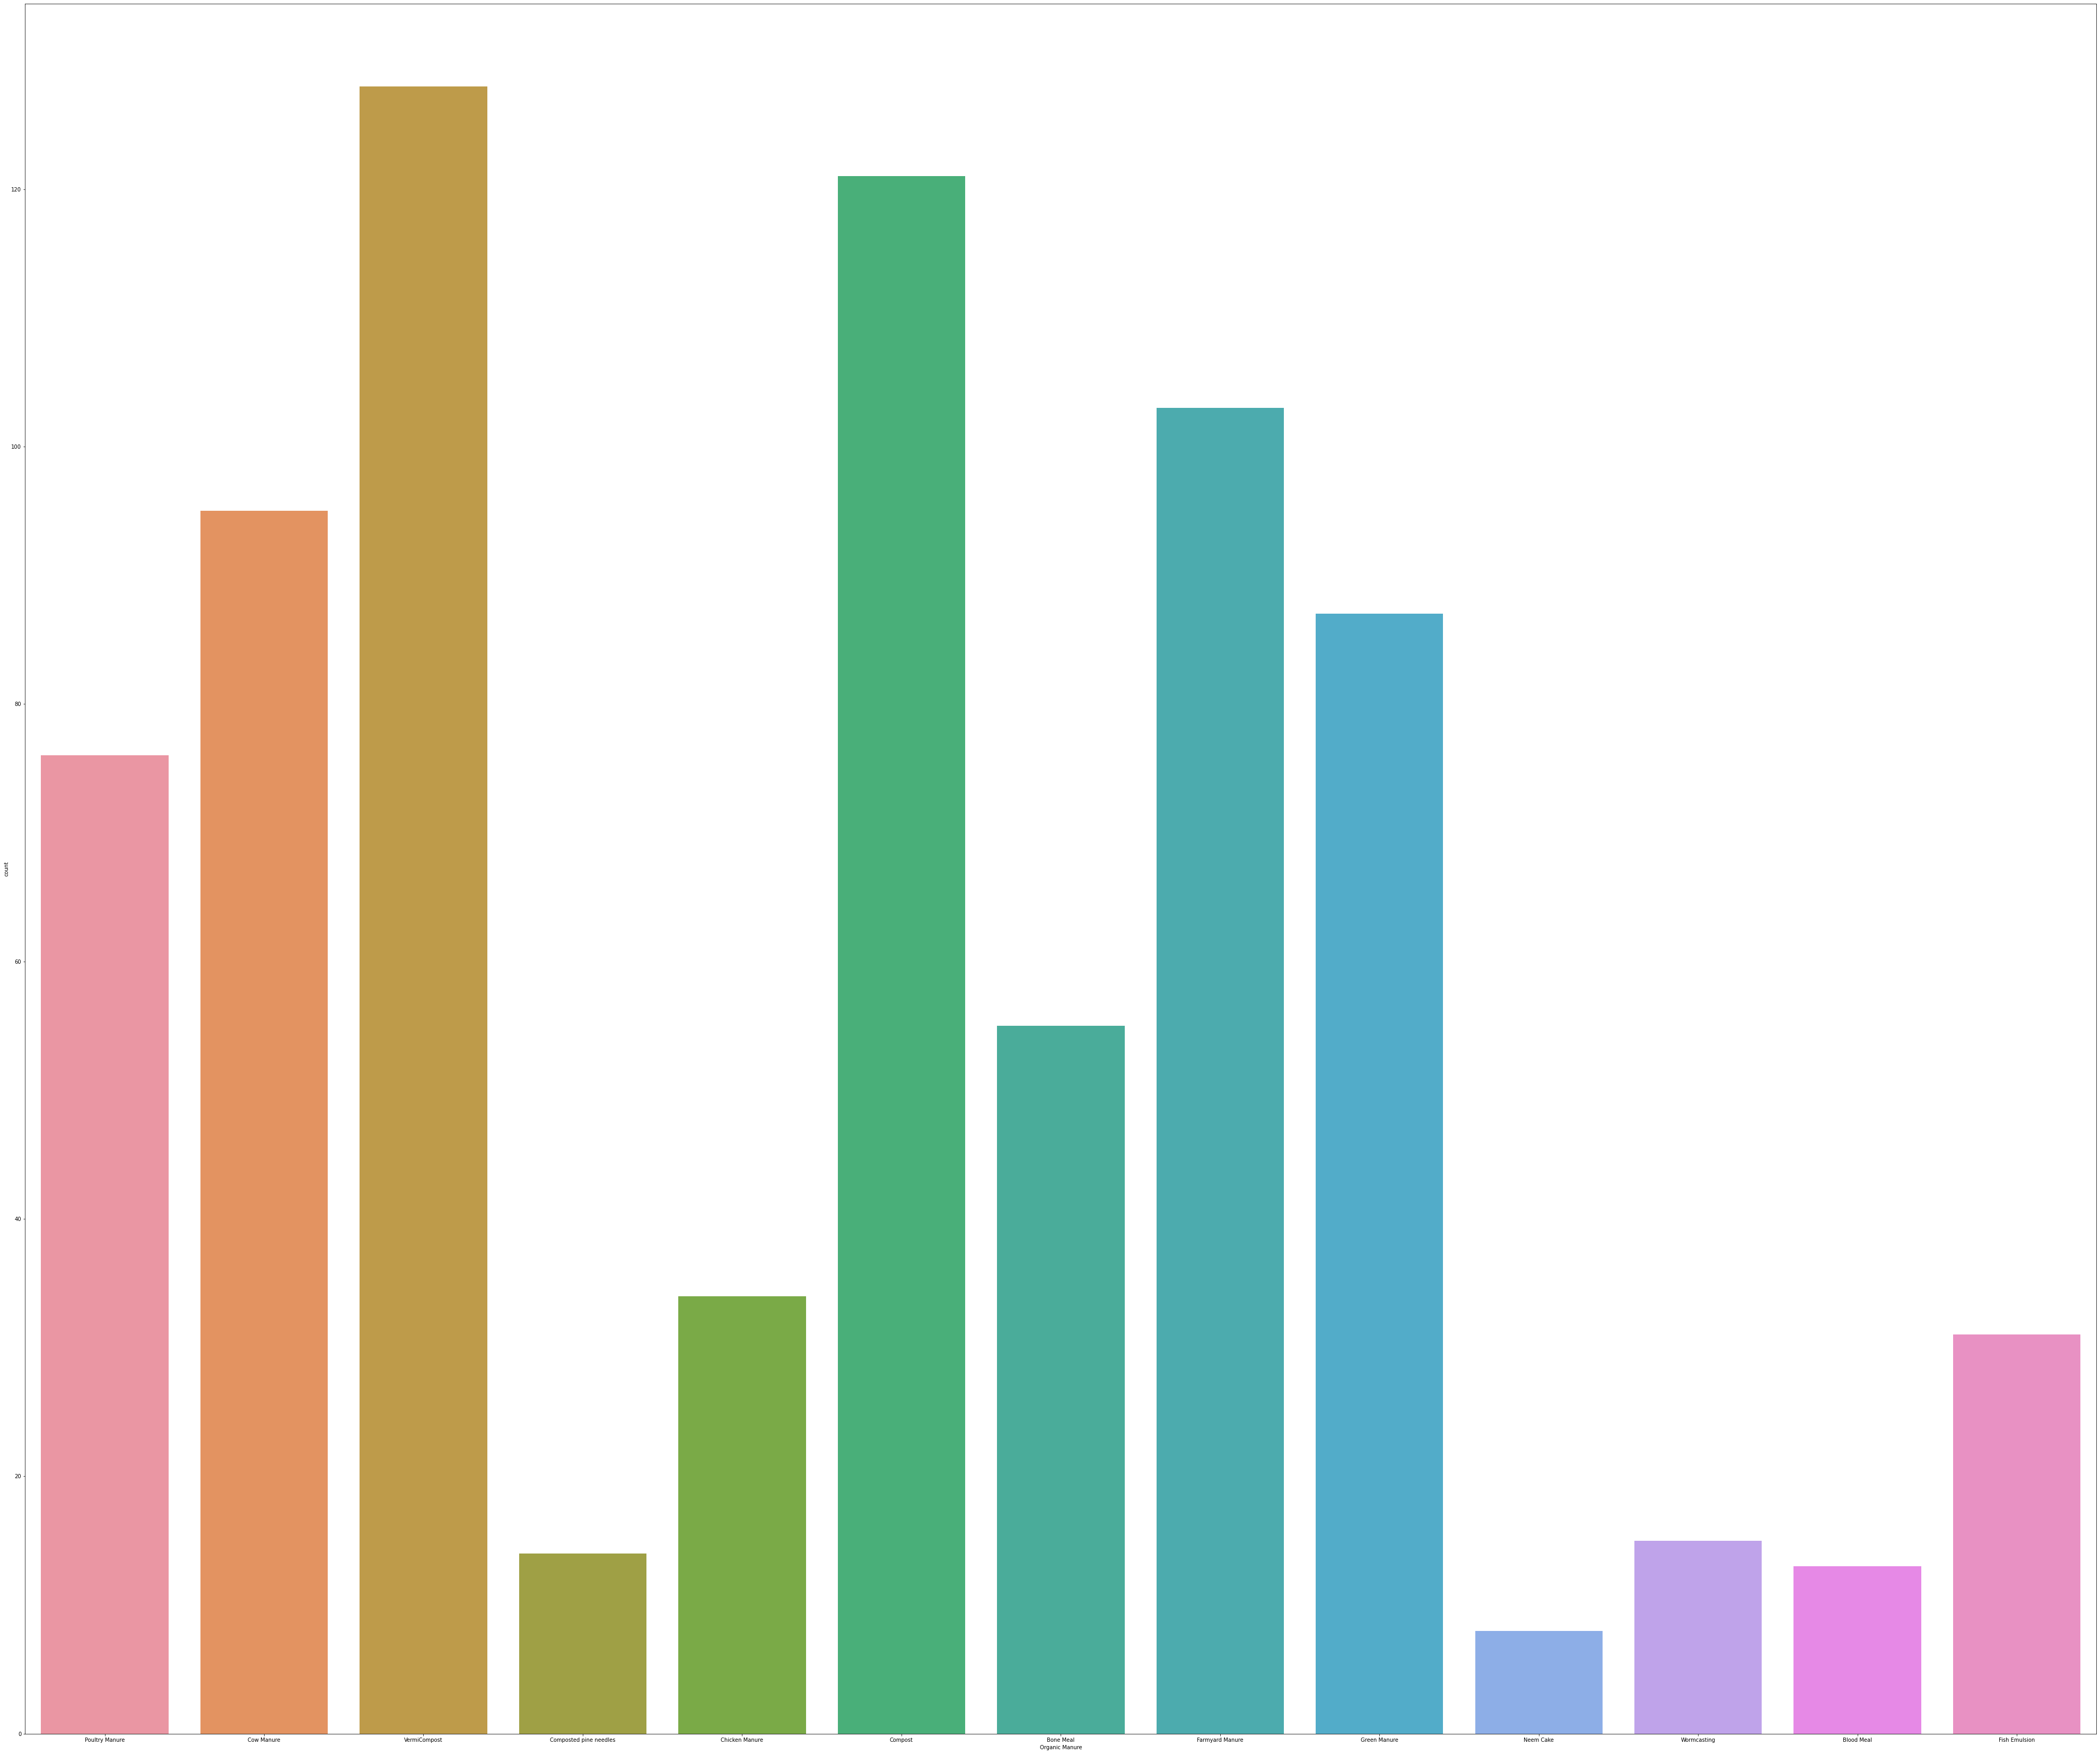

In [24]:
plt.figure(figsize=(70,60))
sns.countplot(x='Organic Manure',data=df)

<AxesSubplot:xlabel='Salinity'>

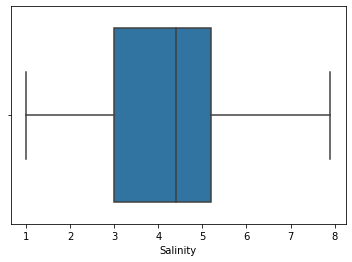

In [25]:
sns.boxplot(x='Salinity',data=df)

C:\Users\aulug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pH', ylabel='Density'>

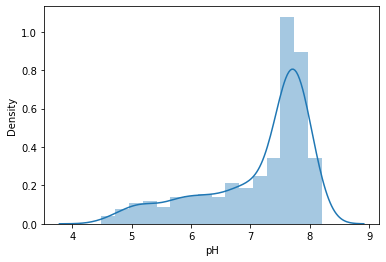

In [26]:
sns.distplot(df['pH'])

C:\Users\aulug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pH'>

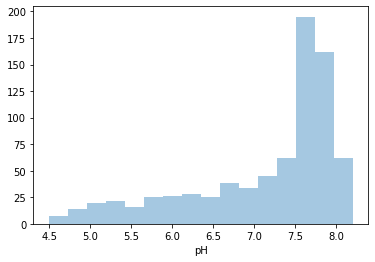

In [27]:
sns.distplot(df['pH'],kde=False,rug=False)

In [28]:
corr=df.corr()
corr

Sand %    Clay %    Silt %        pH  EC mS/cm    O.M. %  \
Sand %     1.000000 -0.715783 -0.348794 -0.289453 -0.069892 -0.360539   
Clay %    -0.715783  1.000000 -0.404807  0.097199  0.008208  0.269447   
Silt %    -0.348794 -0.404807  1.000000  0.248569  0.080503  0.110482   
pH        -0.289453  0.097199  0.248569  1.000000  0.141175  0.105473   
EC mS/cm  -0.069892  0.008208  0.080503  0.141175  1.000000  0.150310   
O.M. %    -0.360539  0.269447  0.110482  0.105473  0.150310  1.000000   
CACO3 %   -0.364464 -0.002333  0.480370  0.629171  0.082124  0.231679   
N_NO3 ppm -0.021094 -0.008808  0.039442 -0.054009  0.601518  0.210564   
P ppm      0.071066 -0.093881  0.032940 -0.107138  0.329903  0.349648   
K ppm     -0.348901  0.299441  0.054989  0.235686  0.265504  0.496116   
Mg ppm    -0.105107  0.483851 -0.511734 -0.244848 -0.002601  0.110291   
Fe ppm     0.186619 -0.013875 -0.225742 -0.835495 -0.107186 -0.005187   
Zn ppm     0.084268 -0.148301  0.088688 -0.141812  0.236894  0.202327   
Mn ppm     0.178582 -0.019342 -0.207882 -0.767296 -0.127764  0.003257   
Cu ppm    -0.143793  0.041429  0.132686 -0.004004  0.487352  0.102468   
B ppm      0.058436 -0.074178  0.023035 -0.371976  0.136053  0.234007   
Salinity  -0.097313 -0.007298  0.137218  0.284799 -0.029865  0.055501   

            CACO3 %  N_NO3 ppm     P ppm    K ppm     Mg ppm    Fe ppm  \
Sand %    -0.364464  -0.021094  0.071066 -0.348901 -0.105107  0.186619   
Clay %    -0.002333  -0.008808 -0.093881  0.299441  0.483851 -0.013875   
Silt %     0.480370   0.039442  0.032940  0.054989 -0.511734 -0.225742   
pH         0.629171  -0.054009 -0.107138  0.235686 -0.244848 -0.835495   
EC mS/cm   0.082124   0.601518  0.329903  0.265504 -0.002601 -0.107186   
O.M. %     0.231679   0.210564  0.349648  0.496116  0.110291 -0.005187   
CACO3 %    1.000000  -0.002266 -0.104016  0.218261 -0.348030 -0.574247   
N_NO3 ppm -0.002266   1.000000  0.304328  0.244254  0.034778  0.009431   
P ppm     -0.104016   0.304328  1.000000  0.476593  0.047414  0.148593   
K ppm      0.218261   0.244254  0.476593  1.000000  0.089384 -0.210331   
Mg ppm    -0.348030   0.034778  0.047414  0.089384  1.000000  0.298922   
Fe ppm    -0.574247   0.009431  0.148593 -0.210331  0.298922  1.000000   
Zn ppm    -0.134705   0.223646  0.612146  0.266379 -0.006680  0.165990   
Mn ppm    -0.494467   0.018451  0.061587 -0.207509  0.131798  0.659953   
Cu ppm     0.031781   0.192255  0.218821  0.213105  0.005339  0.027096   
B ppm     -0.129086   0.206867  0.326955  0.208711  0.074859  0.346780   
Salinity   0.223712  -0.021123 -0.099474  0.052625 -0.104787 -0.282119   

             Zn ppm    Mn ppm    Cu ppm     B ppm  Salinity  
Sand %     0.084268  0.178582 -0.143793  0.058436 -0.097313  
Clay %    -0.148301 -0.019342  0.041429 -0.074178 -0.007298  
Silt %     0.088688 -0.207882  0.132686  0.023035  0.137218  
pH        -0.141812 -0.767296 -0.004004 -0.371976  0.284799  
EC mS/cm   0.236894 -0.127764  0.487352  0.136053 -0.029865  
O.M. %     0.202327  0.003257  0.102468  0.234007  0.055501  
CACO3 %   -0.134705 -0.494467  0.031781 -0.129086  0.223712  
N_NO3 ppm  0.223646  0.018451  0.192255  0.206867 -0.021123  
P ppm      0.612146  0.061587  0.218821  0.326955 -0.099474  
K ppm      0.266379 -0.207509  0.213105  0.208711  0.052625  
Mg ppm    -0.006680  0.131798  0.005339  0.074859 -0.104787  
Fe ppm     0.165990  0.659953  0.027096  0.346780 -0.282119  
Zn ppm     1.000000  0.134310  0.241955  0.281160 -0.090421  
Mn ppm     0.134310  1.000000 -0.007557  0.299675 -0.245577  
Cu ppm     0.241955 -0.007557  1.000000  0.089436 -0.069161  
B ppm      0.281160  0.299675  0.089436  1.000000 -0.127837  
Salinity  -0.090421 -0.245577 -0.069161 -0.127837  1.000000

<AxesSubplot:>

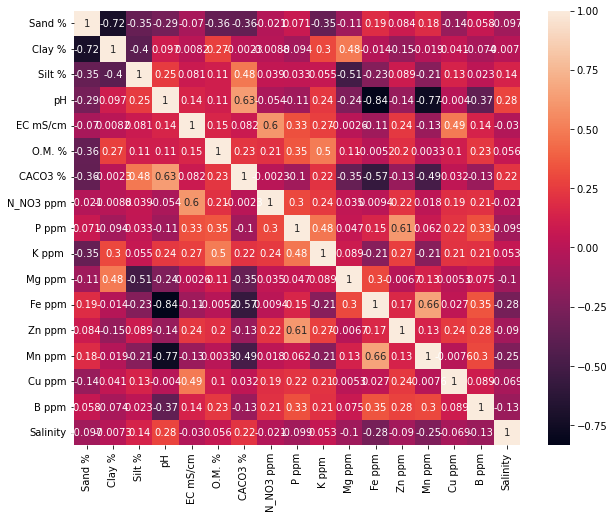

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(data=corr,annot=True)

In [30]:
import pandas as pd  
import plotly.express     
graph = plotly.express.scatter(df, x="pH", y="Crop")    
graph.show()

In [31]:
import pandas as pd  
import plotly.express     
graph = plotly.express.scatter(df, x="Crop", y="Organic Manure")    
graph.show()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

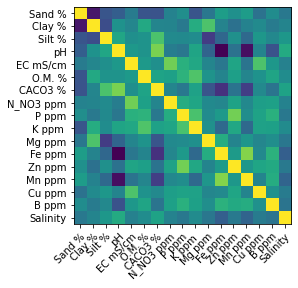

In [32]:
corr = df.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")

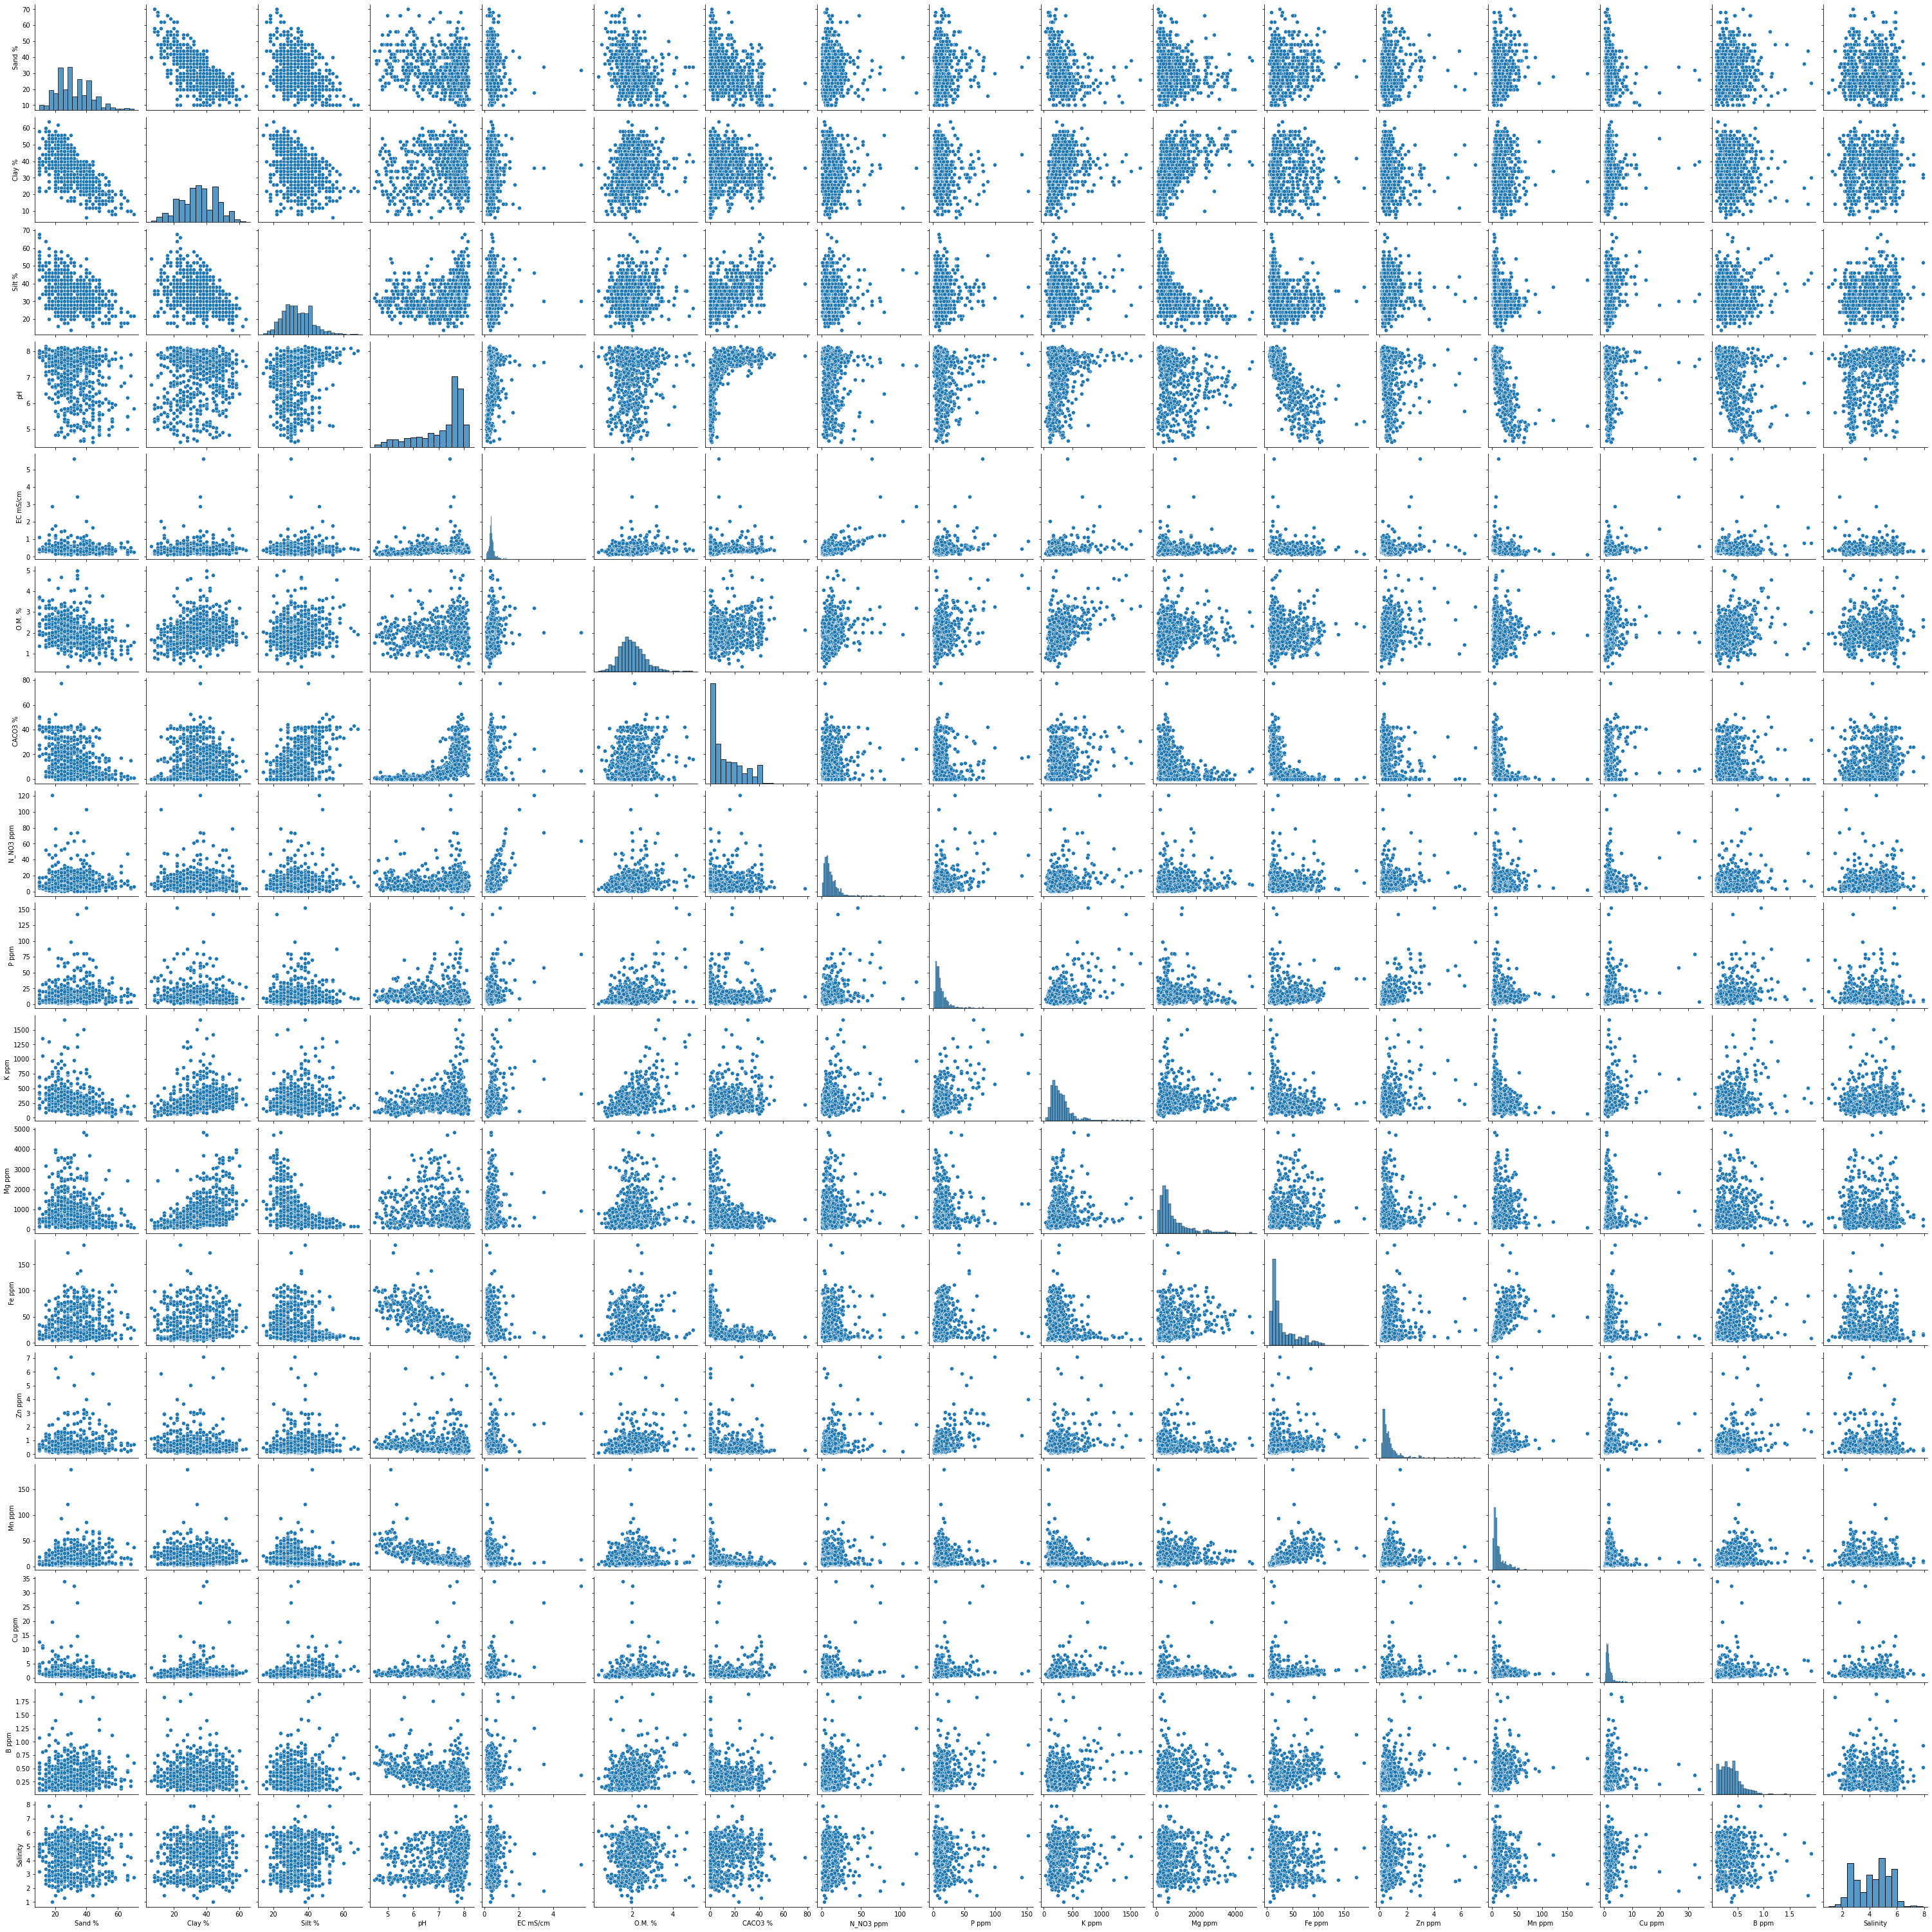

In [33]:
sns.pairplot(df)

C:\Users\aulug\AppData\Local\Temp\ipykernel_32480\3399296555.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



array([[<AxesSubplot:xlabel='Sand %', ylabel='Sand %'>,
        <AxesSubplot:xlabel='Clay %', ylabel='Sand %'>,
        <AxesSubplot:xlabel='Silt %', ylabel='Sand %'>,
        <AxesSubplot:xlabel='pH', ylabel='Sand %'>,
        <AxesSubplot:xlabel='EC mS/cm', ylabel='Sand %'>,
        <AxesSubplot:xlabel='O.M. %', ylabel='Sand %'>,
        <AxesSubplot:xlabel='CACO3 %', ylabel='Sand %'>,
        <AxesSubplot:xlabel='N_NO3 ppm', ylabel='Sand %'>,
        <AxesSubplot:xlabel='P ppm', ylabel='Sand %'>,
        <AxesSubplot:xlabel='K ppm ', ylabel='Sand %'>,
        <AxesSubplot:xlabel='Mg ppm', ylabel='Sand %'>,
        <AxesSubplot:xlabel='Fe ppm', ylabel='Sand %'>,
        <AxesSubplot:xlabel='Zn ppm', ylabel='Sand %'>,
        <AxesSubplot:xlabel='Mn ppm', ylabel='Sand %'>,
        <AxesSubplot:xlabel='Cu ppm', ylabel='Sand %'>,
        <AxesSubplot:xlabel='B ppm', ylabel='Sand %'>,
        <AxesSubplot:xlabel='Salinity', ylabel='Sand %'>],
       [<AxesSubplot:xlabel='Sand %', ylabel=

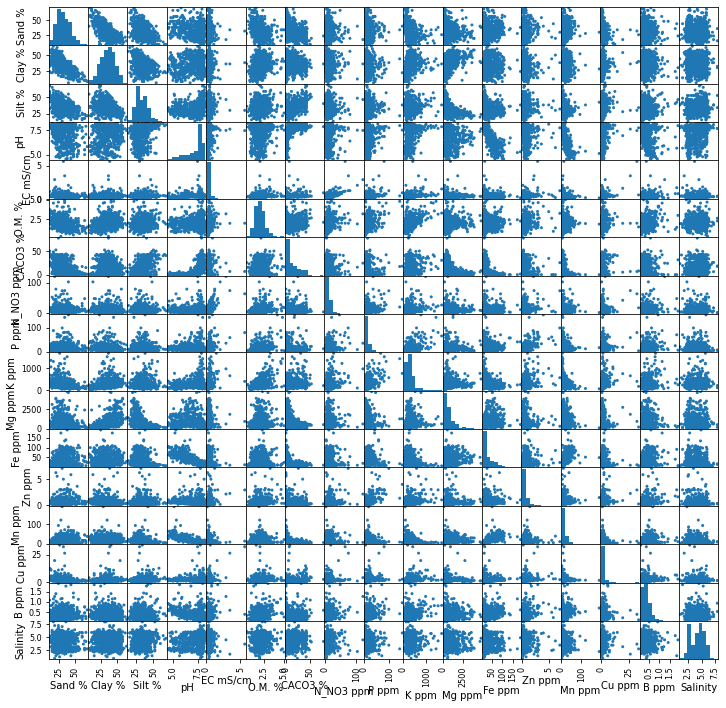

In [34]:
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(df, alpha=1, ax=ax)

In [35]:
def calculateEntropy(df):

    instances = df.shape[0]; columns = df.shape[1]

    decisions = df['Organic Manure'].value_counts().keys().tolist()
#     print(decisions)

    entropy = 0

    for i in range(0, len(decisions)):
        decision = decisions[i]
        num_of_decisions = df['Organic Manure'].value_counts().tolist()[i]
#         print(num_of_decisions)
        class_probability = num_of_decisions/instances
#         print(class_probability)
        entropy = entropy - class_probability*math.log(class_probability, 2)
#         print(entropy)
#         print()
            
    return entropy
print(calculateEntropy(df))

3.3125258078403554


In [36]:
def processContinuousFeatures(df, column_name, entropy):
        unique_values = sorted(df[column_name].unique())
        #print(column_name,"->",unique_values)

        subset_gains = []

        for i in range(0, len(unique_values)-1):
            threshold = unique_values[i]

            subset1 = df[df[column_name] <= threshold]
            subset2 = df[df[column_name] > threshold]

            subset1_rows = subset1.shape[0]; subset2_rows = subset2.shape[0]
            total_instances = df.shape[0] #subset1_rows+subset2_rows

            subset1_probability = subset1_rows / total_instances
            subset2_probability = subset2_rows / total_instances
            threshold_gain = entropy - subset1_probability*calculateEntropy(subset1) - subset2_probability*calculateEntropy(subset2)
            
            subset_gains.append(threshold_gain)
        winner_one = subset_gains.index(max(subset_gains))
        winner_threshold = unique_values[winner_one]
#         print("theshold is ",winner_threshold," for ",column_name)
        df[column_name] = np.where(df[column_name] <= winner_threshold, "<="+str(winner_threshold), ">"+str(winner_threshold))
        return df
    
def findDecision(df):
    entropy = calculateEntropy(df)
    #print("entropy: ",entropy)

    columns = df.shape[1]
    instances = df.shape[0]
    gains = []
    gainratios=[]
    winner_index = -1

    for i in range(0, columns-1):
        column_name = df.columns[i]
        column_type = df[column_name].dtypes
        #print(column_name,"->",column_type)
        if column_type != 'object':
            df = processContinuousFeatures(df, column_name, entropy)
        classes = df[column_name].value_counts()
        gain = entropy * 1
        splitinfo=0
        gainratio=0
        for j in range(0, len(classes)):
            current_class = classes.keys().tolist()[j]
            #print(column_name,"->",current_class)
            subdataset = df[df[column_name] == current_class]
            #print(subdataset)
            subset_instances = subdataset.shape[0]
            class_probability = subset_instances/instances
            subset_entropy = calculateEntropy(subdataset)
            #print("entropy for this sub dataset is ", subset_entropy)
            gain = gain - class_probability * subset_entropy
            splitinfo = splitinfo - class_probability*math.log(class_probability, 2)
        gains.append(gain)
        if splitinfo==0:
            splitinfo=100
        gainratio=gain/splitinfo
        gainratios.append(gainratio)
    if algorithm=="ID3":
        winner_index = gains.index(max(gains))
    elif algorithm=="C4.5":
        winner_index = gainratios.index(max(gainratios))
    winner_name = df.columns[winner_index]
    return winner_name

winner_name=findDecision(df)
print(winner_name)

C:\Users\aulug\AppData\Local\Temp\ipykernel_32480\2720617032.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aulug\AppData\Local\Temp\ipykernel_32480\2720617032.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aulug\AppData\Local\Temp\ipykernel_32480\2720617032.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Crop


C:\Users\aulug\AppData\Local\Temp\ipykernel_32480\2720617032.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
def formatRule(root):
    resp=''
    for i in range(root):
        resp=resp+''
    return resp
def buildDecisionTree(df,root):
    tmp_root=root*1
    df_copy=df.copy()
    winner_name=findDecision(df)
#     print(winner_name)
    columns=df.shape[1]
    for i in range(0,columns-1):
        column_name=df.columns[i]
#         print(column_name)
        if column_name!=winner_name:
            df[column_name]=df_copy[column_name]
    classes=df[winner_name].value_counts().keys().tolist()
    for i in range(len(classes)):
        current_class=classes[i]
        subdataset=df[df[winner_name]==current_class]
        subdataset=subdataset.drop(columns=winner_name)
        if len(subdataset['Organic Manure'].value_counts().tolist())==1:
            final_decision=subdataset['Organic Manure'].value_counts().keys().tolist()[0]
            print(formatRule(root),"if ",winner_name," is ",str(current_class)," then decision is ",final_decision)
        elif subdataset.shape[1]==1:
            final_decision=subdataset['Organic Manure'].value_counts().idxmax()
            print(formatRule(root),"if ",winner_name," is ",str(current_class)," then decision is ",final_decision)
        else:
#             precondition=precondition+"if "+winner_name+" is "+current_class+" AND "
    #       print(precondition)
            root=root+1
            print(formatRule(root),"if ",winner_name," is ",current_class,":")
            buildDecisionTree(subdataset,root)
        root=tmp_root*1
root=0
buildDecisionTree(df,root)

C:\Users\aulug\AppData\Local\Temp\ipykernel_32480\2846898598.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 if  Crop  is  paddy :
 if  Cu ppm  is  <=2.79 :
 if  Silt %  is  <=50.0 :
 if  EC mS/cm  is  >0.321 :
 if  O.M. %  is  >0.99 :
 if  N_NO3 ppm  is  <=26.86 :
 if  P ppm  is  <=38.29 :
 if  K ppm   is  <=551 :
 if  pH  is  <=7.79 :
 if  CACO3 %  is  <=28.3 :
 if  Clay %  is  <=44.8 :
 if  B ppm  is  >0.16 :
 if  Zn ppm  is  <=0.55 :
 if  Mn ppm  is  <=12.1 :
 if  Fe ppm  is  <=22.65 :
 if  Salinity  is  >3.9 :
 if  Mg ppm  is  <=701 :
 if  Sand %  is  >12.0  then decision is  Cow Manure
 if  Mg ppm  is  >701 :
 if  Sand %  is  >12.0  then decision is  Poultry Manure
 if  Salinity  is  <=3.9 :
 if  Sand %  is  >12.0 :
 if  Mg ppm  is  <=701  then decision is  Green Manure
 if  Fe ppm  is  >22.65 :
 if  Mg ppm  is  <=701  then decision is  Poultry Manure
 if  Mg ppm  is  >701  then decision is  Green Manure
 if  Mn ppm  is  >12.1 :
 if  Mg ppm  is  >701  then decision is  Compost
 if  Mg ppm  is  <=701  then decision is  Green Manure
 if  Zn ppm  is  >0.55 :
 if  Fe ppm  is  >22.65 :
 if 

 if  Zn ppm  is  <=0.55 :
 if  Mn ppm  is  <=12.1 :
 if  Sand %  is  >12.0 :
 if  Silt %  is  <=50.0 :
 if  pH  is  <=7.79 :
 if  K ppm   is  <=551 :
 if  Fe ppm  is  <=22.65 :
 if  Cu ppm  is  <=2.79 :
 if  Salinity  is  >3.9  then decision is  Green Manure
 if  Mn ppm  is  >12.1 :
 if  Fe ppm  is  >22.65 :
 if  Sand %  is  >12.0 :
 if  Silt %  is  <=50.0 :
 if  pH  is  <=7.79 :
 if  K ppm   is  <=551 :
 if  Cu ppm  is  <=2.79 :
 if  Salinity  is  >3.9  then decision is  VermiCompost
 if  Fe ppm  is  <=22.65  then decision is  Cow Manure
 if  Zn ppm  is  >0.55 :
 if  Mn ppm  is  >12.1 :
 if  Sand %  is  >12.0 :
 if  Silt %  is  <=50.0 :
 if  pH  is  <=7.79 :
 if  K ppm   is  <=551 :
 if  Fe ppm  is  >22.65 :
 if  Cu ppm  is  <=2.79 :
 if  Salinity  is  >3.9  then decision is  Cow Manure
 if  Mn ppm  is  <=12.1  then decision is  Green Manure
 if  Mg ppm  is  <=701 :
 if  Zn ppm  is  <=0.55  then decision is  Green Manure
 if  Zn ppm  is  >0.55 :
 if  Sand %  is  >12.0 :
 if  Silt %  i

 if  pH  is  <=7.79  then decision is  VermiCompost
 if  pH  is  >7.79  then decision is  Green Manure
 if  P ppm  is  >38.29  then decision is  Cow Manure
 if  Silt %  is  >50.0  then decision is  Composted pine needles
 if  Crop  is   sugarcane :
 if  P ppm  is  <=38.29 :
 if  K ppm   is  <=551 :
 if  CACO3 %  is  <=28.3 :
 if  N_NO3 ppm  is  <=26.86 :
 if  Cu ppm  is  <=2.79 :
 if  Zn ppm  is  <=0.55 :
 if  Mg ppm  is  >701 :
 if  EC mS/cm  is  >0.321 :
 if  Fe ppm  is  >22.65 :
 if  Clay %  is  >44.8 :
 if  Sand %  is  >12.0 :
 if  Silt %  is  <=50.0 :
 if  pH  is  <=7.79 :
 if  O.M. %  is  >0.99 :
 if  Mn ppm  is  >12.1 :
 if  B ppm  is  >0.16 :
 if  Salinity  is  <=3.9  then decision is  VermiCompost
 if  Clay %  is  <=44.8  then decision is  Green Manure
 if  Fe ppm  is  <=22.65  then decision is  VermiCompost
 if  EC mS/cm  is  <=0.321 :
 if  pH  is  >7.79  then decision is  Farmyard Manure
 if  pH  is  <=7.79  then decision is  Poultry Manure
 if  Mg ppm  is  <=701 :
 if  EC m

 if  Fe ppm  is  >22.65  then decision is  VermiCompost
 if  Fe ppm  is  <=22.65  then decision is  Poultry Manure
 if  Mg ppm  is  <=701  then decision is  Farmyard Manure
 if  CACO3 %  is  >28.3 :
 if  Sand %  is  >12.0 :
 if  Clay %  is  <=44.8 :
 if  Silt %  is  <=50.0 :
 if  pH  is  <=7.79 :
 if  O.M. %  is  >0.99 :
 if  N_NO3 ppm  is  <=26.86 :
 if  K ppm   is  <=551 :
 if  Mg ppm  is  <=701 :
 if  Fe ppm  is  <=22.65 :
 if  Zn ppm  is  <=0.55 :
 if  Mn ppm  is  <=12.1 :
 if  Cu ppm  is  <=2.79 :
 if  B ppm  is  >0.16 :
 if  Salinity  is  <=3.9  then decision is  VermiCompost
 if  EC mS/cm  is  <=0.321 :
 if  O.M. %  is  >0.99 :
 if  Mg ppm  is  <=701  then decision is  Green Manure
 if  Mg ppm  is  >701  then decision is  Compost
 if  O.M. %  is  <=0.99  then decision is  Farmyard Manure
 if  P ppm  is  >38.29  then decision is  VermiCompost
 if  Crop  is   turmeric :
 if  P ppm  is  <=38.29 :
 if  B ppm  is  >0.16 :
 if  Fe ppm  is  <=22.65 :
 if  N_NO3 ppm  is  <=26.86 :
 if  

 if  EC mS/cm  is  >0.321 :
 if  O.M. %  is  >0.99 :
 if  N_NO3 ppm  is  <=26.86 :
 if  P ppm  is  <=38.29 :
 if  K ppm   is  <=551 :
 if  Fe ppm  is  <=22.65 :
 if  Zn ppm  is  <=0.55 :
 if  Mn ppm  is  <=12.1 :
 if  Cu ppm  is  <=2.79  then decision is  Compost
 if  Mg ppm  is  >701  then decision is  Compost
 if  B ppm  is  <=0.16 :
 if  Sand %  is  >12.0 :
 if  Clay %  is  <=44.8 :
 if  Silt %  is  <=50.0 :
 if  EC mS/cm  is  >0.321 :
 if  O.M. %  is  >0.99 :
 if  N_NO3 ppm  is  <=26.86 :
 if  P ppm  is  <=38.29 :
 if  K ppm   is  <=551 :
 if  Mg ppm  is  <=701 :
 if  Fe ppm  is  <=22.65 :
 if  Zn ppm  is  >0.55 :
 if  Mn ppm  is  <=12.1 :
 if  Cu ppm  is  <=2.79  then decision is  Compost
 if  CACO3 %  is  >28.3  then decision is  Poultry Manure
 if  pH  is  <=7.79 :
 if  CACO3 %  is  <=28.3 :
 if  EC mS/cm  is  <=0.321  then decision is  Farmyard Manure
 if  EC mS/cm  is  >0.321 :
 if  Mn ppm  is  >12.1  then decision is  Farmyard Manure
 if  Mn ppm  is  <=12.1  then decision is 

 if  pH  is  <=7.79  then decision is  Farmyard Manure
 if  pH  is  >7.79  then decision is  Bone Meal
 if  N_NO3 ppm  is  >26.86  then decision is  Bone Meal
 if  Crop  is   tomato :
 if  Clay %  is  <=44.8 :
 if  Mg ppm  is  <=701 :
 if  B ppm  is  >0.16 :
 if  Fe ppm  is  >22.65 :
 if  Sand %  is  >12.0 :
 if  Silt %  is  <=50.0 :
 if  pH  is  <=7.79 :
 if  EC mS/cm  is  >0.321 :
 if  O.M. %  is  >0.99 :
 if  CACO3 %  is  <=28.3 :
 if  N_NO3 ppm  is  <=26.86 :
 if  P ppm  is  >38.29 :
 if  K ppm   is  <=551 :
 if  Zn ppm  is  >0.55 :
 if  Mn ppm  is  >12.1 :
 if  Cu ppm  is  >2.79 :
 if  Salinity  is  <=3.9  then decision is  Chicken Manure
 if  Fe ppm  is  <=22.65 :
 if  P ppm  is  <=38.29  then decision is  VermiCompost
 if  P ppm  is  >38.29  then decision is  Compost
 if  B ppm  is  <=0.16  then decision is  Bone Meal
 if  Mg ppm  is  >701  then decision is  Poultry Manure
 if  Clay %  is  >44.8 :
 if  Mg ppm  is  >701  then decision is  Wormcasting
 if  Mg ppm  is  <=701  then 

 if  Fe ppm  is  >22.65 :
 if  Zn ppm  is  >0.55  then decision is  Fish Emulsion
 if  Zn ppm  is  <=0.55  then decision is  Compost
 if  Fe ppm  is  <=22.65  then decision is  Compost
 if  Silt %  is  >50.0  then decision is  Fish Emulsion
 if  B ppm  is  <=0.16  then decision is  Wormcasting
 if  Crop  is   brinjal :
 if  Fe ppm  is  >22.65 :
 if  EC mS/cm  is  <=0.321 :
 if  Mg ppm  is  >701  then decision is  Compost
 if  Mg ppm  is  <=701  then decision is  VermiCompost
 if  EC mS/cm  is  >0.321  then decision is  VermiCompost
 if  Fe ppm  is  <=22.65  then decision is  Cow Manure
 if  Crop  is   snake gourd :
 if  Clay %  is  >44.8 :
 if  K ppm   is  <=551 :
 if  Fe ppm  is  <=22.65 :
 if  Mn ppm  is  <=12.1  then decision is  VermiCompost
 if  Mn ppm  is  >12.1  then decision is  Cow Manure
 if  Fe ppm  is  >22.65  then decision is  VermiCompost
 if  K ppm   is  >551  then decision is  Fish Emulsion
 if  Clay %  is  <=44.8  then decision is  Compost
 if  Crop  is   ginger :
 if 

 if  Crop  is   potato   then decision is  Bone Meal
 if  Crop  is   sorghum   then decision is  Blood Meal
 if  Crop  is   cotton    then decision is  Green Manure
 if  Crop  is   brinjal   then decision is  Cow Manure
 if  Crop  is   sesame   then decision is  Green Manure
 if  Crop  is   mango   then decision is  Bone Meal
 if  Crop  is  watermelon  then decision is  VermiCompost
 if  Crop  is   tomato   then decision is  Wormcasting
 if  Crop  is   sugarcane   then decision is  Compost
 if  Crop  is  sweet peas  then decision is  Fish Emulsion


In [38]:
def buildDecisionTree(df):
    tmp_root=root*1
    df_copy=df.copy()
    winner_name=findDecision(df)
#     print(winner_name)
    columns=df.shape[1]
    for i in range(0,columns-1):
        column_name=df.columns[i]
#         print(column_name)
        if column_name!=winner_name:
            df[column_name]=df_copy[column_name]
    classes=df[winner_name].value_counts().keys().tolist()
    tree = {winner_name:{}}
    for i in range(len(classes)):
        current_class=classes[i]
        subdataset=df[df[winner_name]==current_class]
        subdataset=subdataset.drop(columns=winner_name)
        if len(subdataset['Organic Manure'].value_counts().tolist())==1:
            final_decision=subdataset['Organic Manure'].value_counts().keys().tolist()[0]
#             print(formatRule(root),"if ",winner_name," is ",str(current_class)," then decision is ",final_decision)
        elif subdataset.shape[1]==1:
            final_decision=subdataset['Organic Manure'].value_counts().idxmax()
#             print(formatRule(root),"if ",winner_name," is ",str(current_class)," then decision is ",final_decision)
        else:
#             precondition=precondition+"if "+winner_name+" is "+current_class+" AND "
    #       print(precondition)
#             print(formatRule(root),"if ",winner_name," is ",current_class,":")
            sub_tree=buildDecisionTree(subdataset)
            tree[winner_name][current_class] = sub_tree
    return tree

tree=buildDecisionTree(df)
print(tree)

C:\Users\aulug\AppData\Local\Temp\ipykernel_32480\195761552.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'Crop': {'paddy': {'Cu ppm': {'<=2.79': {'Silt %': {'<=50.0': {'EC mS/cm': {'>0.321': {'O.M. %': {'>0.99': {'N_NO3 ppm': {'<=26.86': {'P ppm': {'<=38.29': {'K ppm ': {'<=551': {'pH': {'<=7.79': {'CACO3 %': {'<=28.3': {'Clay %': {'<=44.8': {'B ppm': {'>0.16': {'Zn ppm': {'<=0.55': {'Mn ppm': {'<=12.1': {'Fe ppm': {'<=22.65': {'Salinity': {'>3.9': {'Mg ppm': {'<=701': {'Sand %': {}}, '>701': {'Sand %': {}}}}, '<=3.9': {'Sand %': {'>12.0': {'Mg ppm': {}}}}}}, '>22.65': {'Mg ppm': {}}}}, '>12.1': {'Mg ppm': {}}}}, '>0.55': {'Fe ppm': {'>22.65': {'Mg ppm': {'<=701': {'Mn ppm': {'>12.1': {'Sand %': {'>12.0': {'Salinity': {}}}}}}}}, '<=22.65': {'Sand %': {'>12.0': {'Mg ppm': {'>701': {'Mn ppm': {'<=12.1': {'Salinity': {}}}}}}}}}}}}}}, '>44.8': {'Zn ppm': {'<=0.55': {'Mg ppm': {}}, '>0.55': {'Salinity': {}}}}}}}}}}}}, '>38.29': {'Mn ppm': {}}}}, '>26.86': {'Mg ppm': {}}}}}}}}}}, '>2.79': {'CACO3 %': {}}}}, ' groundnut': {'Silt %': {'<=50.0': {'Sand %': {'>12.0': {'Clay %': {'<=44.8': {'Mn ppm

In [39]:
pip install chefboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
from chefboost import Chefboost as chef
config={'algorithm':'ID3'}
model=chef.fit(df,config,target_label="Organic Manure")

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  322.17473554611206  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  90.8974358974359 % on  780  instances
Labels:  ['Poultry Manure' 'Cow Manure' 'VermiCompost' 'Composted pine needles'
 'Chicken Manure' 'Compost' 'Bone Meal' 'Farmyard Manure' 'Green Manure'
 'Neem Cake' 'Wormcasting' 'Blood Meal' 'Fish Emulsion']
Confusion matrix:  [[68, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0], [3, 86, 3, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], [2, 2, 116, 0, 0, 2, 1, 3, 5, 0, 0, 0, 0], [0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 1, 0, 28, 0, 0, 0, 1, 0, 0, 0, 1], [1, 0, 1, 0, 1, 114, 2, 2, 3, 0, 0, 0, 2], [0, 1, 0, 0, 2, 0, 51, 0, 0, 0, 0, 0, 1], [0, 0, 2, 0, 0, 1, 0, 98, 0, 0, 0, 0, 0], [2, 2, 3, 0, 1, 2, 1, 0, 75, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Organic Manure"])

In [57]:
from chefboost import Chefboost as chef
config={'algorithm':'C4.5'}
model=chef.fit(df,config,target_label="Organic Manure")

[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  308.5887703895569  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  90.8974358974359 % on  780  instances
Labels:  ['Poultry Manure' 'Cow Manure' 'VermiCompost' 'Composted pine needles'
 'Chicken Manure' 'Compost' 'Bone Meal' 'Farmyard Manure' 'Green Manure'
 'Neem Cake' 'Wormcasting' 'Blood Meal' 'Fish Emulsion']
Confusion matrix:  [[68, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0], [3, 86, 3, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], [2, 2, 116, 0, 0, 2, 1, 3, 5, 0, 0, 0, 0], [0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 1, 0, 28, 0, 0, 0, 1, 0, 0, 0, 1], [1, 0, 1, 0, 1, 114, 2, 2, 3, 0, 0, 0, 2], [0, 1, 0, 0, 2, 0, 51, 0, 0, 0, 0, 0, 1], [0, 0, 2, 0, 0, 1, 0, 98, 0, 0, 0, 0, 0], [2, 2, 3, 0, 1, 2, 1, 0, 75, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0

In [62]:
eval=chef.evaluate(model,X_train,target_label='Organic Manure',task='train')

-------------------------
Evaluate  train set
-------------------------
Accuracy:  90.7051282051282 % on  624  instances
Labels:  ['Bone Meal' 'Farmyard Manure' 'Poultry Manure' 'VermiCompost'
 'Cow Manure' 'Compost' 'Green Manure' 'Chicken Manure' 'Fish Emulsion'
 'Neem Cake' 'Wormcasting' 'Composted pine needles' 'Blood Meal']
Confusion matrix:  [[41, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0], [0, 79, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 54, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 2, 2, 93, 2, 2, 5, 0, 0, 0, 0, 0, 0], [0, 0, 2, 1, 69, 0, 1, 1, 1, 0, 1, 0, 0], [2, 1, 1, 1, 0, 92, 3, 1, 1, 0, 0, 0, 0], [1, 0, 2, 3, 2, 2, 59, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 1, 21, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 1, 21, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9]]
Decision  Bone Meal  => Accuray:  99.0385 %, Precision:  93.1818 %, Recall:  93.1818 %, F1:  93.1818 %
De

In [63]:
evaluation = chef.evaluate(model, X_test, target_label='Organic Manure', task="test")

-------------------------
Evaluate  test set
-------------------------
Accuracy:  91.66666666666667 % on  156  instances
Labels:  ['Chicken Manure' 'Green Manure' 'VermiCompost' 'Cow Manure' 'Blood Meal'
 'Compost' 'Farmyard Manure' 'Poultry Manure' 'Wormcasting' 'Bone Meal'
 'Fish Emulsion' 'Neem Cake' 'Composted pine needles']
Confusion matrix:  [[7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 23, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 2, 17, 0, 1, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 22, 1, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 19, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 10, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]]
Decision  Chicken Manure  => Accuray:  99.359 %, Precision:  87.5 %, Recall:  100.0 %, F1:  93.3333 %
Decisio

In [64]:
df_copy.iloc[600]

ID                      601
Sand %                 50.0
Clay %                 32.0
Silt %                 18.0
pH                     7.02
EC mS/cm               0.51
O.M. %                 1.64
CACO3 %                 5.0
N_NO3 ppm              6.96
P ppm                 25.03
K ppm                   251
Mg ppm                 1786
Fe ppm                32.17
Zn ppm                 0.64
Mn ppm                14.09
Cu ppm                  1.9
B ppm                  0.44
Crop                  maize
Salinity                4.2
Organic Manure    Bone Meal
Name: 600, dtype: object

In [65]:
# Prediction on training instance
prediction=chef.predict(model,df.iloc[600])
prediction

'Bone Meal'

In [66]:
for index,instance in df.iterrows():
    prediction=chef.predict(model,instance)
    actual=instance["Organic Manure"]
    if actual!=prediction:
        print(actual," - ",prediction)

Farmyard Manure  -  Compost
Chicken Manure  -  Compost
VermiCompost  -  Chicken Manure
Poultry Manure  -  Compost
Farmyard Manure  -  VermiCompost
Compost  -  VermiCompost
Green Manure  -  VermiCompost
Green Manure  -  Compost
Cow Manure  -  Chicken Manure
Poultry Manure  -  Cow Manure
Compost  -  Farmyard Manure
VermiCompost  -  Farmyard Manure
Green Manure  -  VermiCompost
Fish Emulsion  -  Cow Manure
Farmyard Manure  -  VermiCompost
Green Manure  -  Poultry Manure
Compost  -  Cow Manure
Fish Emulsion  -  Compost
Poultry Manure  -  VermiCompost
VermiCompost  -  Poultry Manure
Compost  -  Green Manure
VermiCompost  -  Cow Manure
Poultry Manure  -  Cow Manure
Green Manure  -  VermiCompost
Fish Emulsion  -  Compost
Blood Meal  -  Fish Emulsion
VermiCompost  -  Farmyard Manure
Cow Manure  -  Poultry Manure
Poultry Manure  -  Green Manure
VermiCompost  -  Green Manure
VermiCompost  -  Green Manure
Bone Meal  -  Compost
Cow Manure  -  VermiCompost
Cow Manure  -  Green Manure
VermiCompost  

In [45]:
df["Organic Manure"].value_counts()

VermiCompost              128
Compost                   121
Farmyard Manure           103
Cow Manure                 95
Green Manure               87
Poultry Manure             76
Bone Meal                  55
Chicken Manure             34
Fish Emulsion              31
Wormcasting                15
Composted pine needles     14
Blood Meal                 13
Neem Cake                   8
Name: Organic Manure, dtype: int64

In [46]:
model["trees"]

[<module 'outputs/rules/rules' from 'C:\\Users\\aulug\\Downloads\\outputs/rules/rules.py'>]

In [47]:
moduleName = "outputs/rules/rules" 
tree = chef.restoreTree(moduleName)
print(tree)

<module 'outputs/rules/rules' from 'C:\\Users\\aulug\\Downloads\\outputs/rules/rules.py'>


In [67]:
# Prediction on new instance
chef.predict(model,param=['22.2','33.4','44.9','7.5','1.7','2.8','42.3','15.5','26.7','423','1350','75.4','2.5','30.6','4.82','0.58','Barley','6.5'])

'Poultry Manure'